<a href="https://www.kaggle.com/code/kiranpatil7022/seoul-bike-insights-and-predictions?scriptVersionId=147446244" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## **1. Loading libraries and data**

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/seoul-bike-trip-duration-prediction/For_modeling.csv


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(
    "/kaggle/input/seoul-bike-trip-duration-prediction/For_modeling.csv",
    dtype={
        'Duration' : 'int8',
        'Distance' : 'int8',
        'PLong' : 'float32',
        'PLatd' : 'float32',
        'DLong' : 'float32',
        'DLatd' : 'float32',
        'Haversine' : 'float32',
        'Pmonth' : 'int8',
        'Pday' : 'int8',
        'Phour' : 'int8',
        'Pmin' : 'int8',
        'PDweek' : 'int8',
        'Dmonth' : 'int8',
        'Dday' : 'int8',
        'Dhour' : 'int8',
        'Dmin' : 'int8',
        'DDweek' : 'int8',
        'Temp' : 'float32',
        'Precip' : 'float32',
        'Wind' : 'float32',
        'Humid' : 'float32',
        'Solar' : 'float32',
        'Snow' : 'float32',
        'GroundTemp' : 'float32',
        'Dust' : 'float32'
    },
    index_col=0
).sample(frac=1)
df.head()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
3531017,8,-26,37.560234,126.823471,37.568577,126.824776,0.934804,7,3,7,...,3,1,23.500000,0.0,0.2,86.0,0.38,0.0,23.700001,0.0
3663962,8,-60,37.594250,127.076576,37.602077,127.079582,0.909725,7,6,11,...,23,4,23.900000,0.0,2.1,59.0,1.08,0.0,29.100000,7.0
6980688,56,-88,37.544582,127.044609,37.551250,127.035103,1.118963,9,30,16,...,1,6,21.200001,0.0,3.2,28.0,1.77,0.0,30.700001,14.0
562942,14,40,37.591614,127.045792,37.574188,127.045891,1.937705,3,19,15,...,20,0,9.800000,0.0,3.0,57.0,0.43,0.0,9.300000,17.0
3314292,116,94,37.500614,126.986160,37.500614,126.986160,0.000000,6,24,18,...,1,6,29.799999,0.0,3.3,35.0,1.15,0.0,35.099998,31.0


In [4]:
df.shape

(9601139, 25)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9601139 entries, 3531017 to 716158
Data columns (total 25 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Duration    int8   
 1   Distance    int8   
 2   PLong       float32
 3   PLatd       float32
 4   DLong       float32
 5   DLatd       float32
 6   Haversine   float32
 7   Pmonth      int8   
 8   Pday        int8   
 9   Phour       int8   
 10  Pmin        int8   
 11  PDweek      int8   
 12  Dmonth      int8   
 13  Dday        int8   
 14  Dhour       int8   
 15  Dmin        int8   
 16  DDweek      int8   
 17  Temp        float32
 18  Precip      float32
 19  Wind        float32
 20  Humid       float32
 21  Solar       float32
 22  Snow        float32
 23  GroundTemp  float32
 24  Dust        float32
dtypes: float32(13), int8(12)
memory usage: 659.3 MB


## **2. Exploratory Data Analysis**

In [6]:
df.columns

Index(['Duration', 'Distance', 'PLong', 'PLatd', 'DLong', 'DLatd', 'Haversine',
       'Pmonth', 'Pday', 'Phour', 'Pmin', 'PDweek', 'Dmonth', 'Dday', 'Dhour',
       'Dmin', 'DDweek', 'Temp', 'Precip', 'Wind', 'Humid', 'Solar', 'Snow',
       'GroundTemp', 'Dust'],
      dtype='object')

In [7]:
df.describe()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
count,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,...,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06
mean,2.580294e+01,-9.069010e-01,3.754738e+01,1.269909e+02,3.754747e+01,1.269908e+02,1.870314e+00,7.578754e+00,1.576714e+01,1.437801e+01,...,2.999278e+01,2.945771e+00,1.856201e+01,1.784855e-02,1.819273e+00,5.397564e+01,7.300681e-01,9.948911e-03,2.072376e+01,3.245798e+01
std,2.504333e+01,7.404757e+01,4.441376e-02,8.257065e-02,4.445305e-02,8.323726e-02,1.995361e+00,2.696797e+00,8.748012e+00,6.249244e+00,...,1.730960e+01,1.977624e+00,9.498075e+00,3.736281e-01,9.710258e-01,1.742159e+01,9.175004e-01,1.628091e-01,1.265221e+01,2.407264e+01
min,1.000000e+00,-1.280000e+02,3.743727e+01,1.267986e+02,3.743727e+01,1.267986e+02,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,-1.780000e+01,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,-1.360000e+01,0.000000e+00
25%,8.000000e+00,-6.600000e+01,3.751424e+01,1.269200e+02,3.751424e+01,1.269194e+02,6.758669e-01,6.000000e+00,8.000000e+00,1.000000e+01,...,1.500000e+01,1.000000e+00,1.220000e+01,0.000000e+00,1.100000e+00,4.100000e+01,0.000000e+00,0.000000e+00,1.160000e+01,1.600000e+01
50%,1.600000e+01,0.000000e+00,3.754693e+01,1.269943e+02,3.754655e+01,1.269947e+02,1.257498e+00,8.000000e+00,1.600000e+01,1.600000e+01,...,3.000000e+01,3.000000e+00,2.010000e+01,0.000000e+00,1.700000e+00,5.300000e+01,2.700000e-01,0.000000e+00,2.110000e+01,2.700000e+01
75%,3.600000e+01,6.400000e+01,3.757324e+01,1.270618e+02,3.757324e+01,1.270624e+02,2.363812e+00,1.000000e+01,2.300000e+01,1.900000e+01,...,4.500000e+01,5.000000e+00,2.550000e+01,0.000000e+00,2.400000e+00,6.700000e+01,1.260000e+00,0.000000e+00,2.850000e+01,4.200000e+01
max,1.190000e+02,1.260000e+02,3.768972e+01,1.271803e+02,3.768972e+01,1.271803e+02,2.863448e+01,1.200000e+01,3.100000e+01,2.300000e+01,...,5.900000e+01,6.000000e+00,3.940000e+01,3.500000e+01,7.400000e+00,9.800000e+01,3.520000e+00,8.800000e+00,6.220000e+01,3.040000e+02


**Observations:**
1. Distance: there are data points where the distance value is negatice (-ve)
2. Haversine: there are data points where the haversine value is 0. 

**Observation analysis 1. Distance**  
Exploring the data points where the distance is negative.

In [8]:
df.shape

(9601139, 25)

In [9]:
df[df['Distance']<0].shape

(4787174, 25)

In [10]:
df[df['Distance']<0].head()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
3531017,8,-26,37.560234,126.823471,37.568577,126.824776,0.934804,7,3,7,...,3,1,23.500000,0.0,0.2,86.0,0.38,0.0,23.700001,0.0
3663962,8,-60,37.594250,127.076576,37.602077,127.079582,0.909725,7,6,11,...,23,4,23.900000,0.0,2.1,59.0,1.08,0.0,29.100000,7.0
6980688,56,-88,37.544582,127.044609,37.551250,127.035103,1.118963,9,30,16,...,1,6,21.200001,0.0,3.2,28.0,1.77,0.0,30.700001,14.0
1244615,101,-44,37.471165,126.937019,37.478428,126.931862,0.927006,4,24,21,...,6,1,11.500000,0.0,1.1,47.0,0.00,0.0,7.500000,8.0
9265648,31,-118,37.568192,127.057175,37.574718,127.053391,0.798623,11,28,12,...,58,2,7.900000,0.0,1.7,14.0,1.81,0.0,12.200000,82.0


In [11]:
# transforming all the -ve distance to +ve distance
df['Distance'] = df['Distance'].apply(lambda x: abs(x))

In [12]:
df[df['Distance']<0].shape

(0, 25)

**Observation analysis 2. haversine**    
Exploring the data points where the haversine value is 0.   
It should mean that pick up and drop off location (longitude and latitude) are the same.

In [13]:
df.shape

(9601139, 25)

In [14]:
df[df['Haversine']==0].shape

(955083, 25)

In [15]:
df[df['Haversine']==0].reset_index().drop(columns=['index']).head()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,116,94,37.500614,126.986160,37.500614,126.986160,0.0,6,24,18,...,1,6,29.799999,0.0,3.3,35.0,1.15,0.0,35.099998,31.0
1,43,114,37.513523,126.943527,37.513523,126.943527,0.0,5,25,10,...,7,4,21.400000,0.0,2.5,30.0,2.53,0.0,32.500000,117.0
2,53,18,37.513126,127.100960,37.513126,127.100960,0.0,11,3,16,...,10,5,18.700001,0.0,2.1,25.0,1.07,0.0,18.000000,36.0
3,86,34,37.459953,127.024742,37.459953,127.024742,0.0,9,24,17,...,14,0,21.600000,0.0,3.1,32.0,1.20,0.0,24.200001,8.0
4,36,60,37.511280,127.078239,37.511280,127.078239,0.0,4,13,22,...,12,4,16.299999,0.0,2.0,25.0,0.00,0.0,11.300000,22.0


In [16]:
df[df['Haversine']==0].reset_index().drop(columns=['index']).describe()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
count,955083.000000,955083.000000,955083.000000,955083.000000,955083.000000,955083.000000,955083.0,955083.000000,955083.000000,955083.000000,...,955083.000000,955083.000000,955083.000000,955083.000000,955083.000000,955083.000000,955083.000000,955083.000000,955083.000000,955083.000000
mean,49.878425,63.555497,37.546597,126.989731,37.546597,126.989731,0.0,7.367401,15.648030,15.695371,...,29.606122,3.191605,20.290335,0.015202,1.937013,51.137764,0.896492,0.007591,23.291319,32.303020
std,30.473000,36.989730,0.045334,0.084399,0.045334,0.084399,0.0,2.556475,8.761283,5.232936,...,17.347721,2.069881,8.441665,0.309063,0.961516,17.037958,0.991830,0.143294,11.826364,23.582991
min,2.000000,0.000000,37.437271,126.798599,37.437271,126.798599,0.0,1.000000,1.000000,0.000000,...,0.000000,0.000000,-17.799999,0.000000,0.000000,10.000000,0.000000,0.000000,-13.600000,0.000000
25%,26.000000,32.000000,37.514088,126.918503,37.514088,126.918503,0.0,5.000000,8.000000,13.000000,...,15.000000,1.000000,15.700000,0.000000,1.200000,38.000000,0.000000,0.000000,15.800000,16.000000
50%,47.000000,64.000000,37.542816,126.995476,37.542816,126.995476,0.0,8.000000,16.000000,17.000000,...,29.000000,3.000000,21.600000,0.000000,1.800000,50.000000,0.510000,0.000000,23.299999,27.000000
75%,69.000000,96.000000,37.572113,127.062424,37.572113,127.062424,0.0,9.000000,23.000000,20.000000,...,45.000000,5.000000,26.299999,0.000000,2.600000,63.000000,1.680000,0.000000,30.299999,42.000000
max,119.000000,128.000000,37.689720,127.180267,37.689720,127.180267,0.0,12.000000,31.000000,23.000000,...,59.000000,6.000000,39.400002,35.000000,7.400000,98.000000,3.520000,8.800000,62.200001,304.000000


- Despite having a haversine distance of 0, indicating that the pick-up and drop-off locations are identical, the duration of trips exhibits a minimum value of 2 minutes and a maximum value of 119 minutes. 
- This suggests that bicycles may have traveled round-trip journeys, returning to the pick-up location after visiting other destinations. 
- The removal of such data points could potentially impact the performance of the model.

In [17]:
df[df['Distance']==0].shape

(69022, 25)

In [18]:
df[df['Distance']==0].head()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
7246976,19,0,37.489178,126.919273,37.484230,126.926392,0.835020,10,6,16,...,30,5,21.500000,0.0,3.4,62.0,1.26,0.0,22.5,10.0
3910448,6,0,37.565990,126.987793,37.576241,126.986160,1.148911,7,13,7,...,44,4,25.000000,0.0,1.0,83.0,0.13,0.0,24.9,13.0
952369,11,0,37.561012,127.054237,37.572174,127.071388,1.955912,4,10,18,...,5,1,19.700001,0.0,7.2,52.0,0.20,0.0,15.9,36.0
874728,9,0,37.555054,126.937569,37.549202,126.923203,1.423832,4,4,22,...,2,2,10.900000,0.0,1.5,58.0,0.00,0.0,9.7,8.0
6038239,76,0,37.514240,127.123070,37.516571,127.131538,0.790565,9,10,17,...,46,0,26.600000,0.0,1.4,40.0,0.69,0.0,29.5,15.0


In [19]:
filtered_df = df.loc[(df['Distance'] == 0) &
                      (df['Haversine'] == 0) &
                      (df['Pmonth'] == df['Dmonth']) &
                      (df['Pday'] == df['Dday']) &
                      (df['Phour'] == df['Dhour']) &
                      (df['Pmin'] == df['Dmin']) &
                      (df['PDweek'] == df['DDweek'])]

# Print the filtered DataFrame
filtered_df

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
7146902,54,0,37.520451,127.104202,37.520451,127.104202,0.0,10,3,17,...,10,2,23.299999,0.0,1.7,36.0,0.95,0.0,25.299999,19.0
7410564,31,0,37.573666,127.030815,37.573666,127.030815,0.0,10,9,16,...,22,1,19.000000,0.0,1.4,39.0,0.89,0.0,19.600000,28.0
7410565,31,0,37.573666,127.030815,37.573666,127.030815,0.0,10,9,16,...,22,1,19.000000,0.0,1.4,39.0,0.89,0.0,19.600000,28.0
1105117,42,0,37.483990,127.034180,37.483990,127.034180,0.0,4,17,19,...,7,1,14.500000,0.0,3.1,31.0,0.25,0.0,13.200000,91.0
7410566,31,0,37.573666,127.030815,37.573666,127.030815,0.0,10,9,16,...,22,1,19.000000,0.0,1.4,39.0,0.89,0.0,19.600000,28.0
7417860,97,0,37.523300,127.038475,37.523300,127.038475,0.0,10,9,16,...,29,1,19.000000,0.0,1.4,39.0,0.89,0.0,19.600000,28.0
7146899,54,0,37.520451,127.104202,37.520451,127.104202,0.0,10,3,17,...,10,2,23.299999,0.0,1.7,36.0,0.95,0.0,25.299999,19.0
1105115,42,0,37.483990,127.034180,37.483990,127.034180,0.0,4,17,19,...,7,1,14.500000,0.0,3.1,31.0,0.25,0.0,13.200000,91.0
7417862,97,0,37.523300,127.038475,37.523300,127.038475,0.0,10,9,16,...,29,1,19.000000,0.0,1.4,39.0,0.89,0.0,19.600000,28.0
7417857,97,0,37.523300,127.038475,37.523300,127.038475,0.0,10,9,16,...,29,1,19.000000,0.0,1.4,39.0,0.89,0.0,19.600000,28.0


In [20]:
filtered_df.shape

(15, 25)

If both the Haversine distance and the actual distance are 0, then it is likely that the bicycle has not moved at all. This could be due to a number of reasons, such as:

- The bicycle was parked for the entire duration of the trip.
- The bicycle was moved a very short distance, but not enough to register on the GPS device.
- There was an error in the GPS data.

Removing these data points would be good for having better model performance

In [21]:
df = df.drop(filtered_df.index)

In [22]:
df.shape

(9601124, 25)

In [23]:
filtered_df1 = df.loc[(df['Distance'] == 0) &
                      (df['Haversine'] == 0)]

In [24]:
filtered_df1

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
8652011,26,0,37.542580,127.063309,37.542580,127.063309,0.0,11,7,12,...,53,2,13.200000,0.0,1.3,77.0,0.50,0.0,16.000000,46.0
3902799,66,0,37.626614,127.072754,37.626614,127.072754,0.0,7,12,22,...,36,3,25.900000,0.0,0.6,83.0,0.00,0.0,24.000000,16.0
4018840,43,0,37.500614,126.986160,37.500614,126.986160,0.0,7,15,22,...,36,6,27.500000,0.0,0.9,77.0,0.00,0.0,26.700001,19.0
4514975,53,0,37.556862,127.079140,37.556862,127.079140,0.0,7,29,22,...,34,6,30.400000,0.0,1.6,45.0,0.00,0.0,28.200001,8.0
8642840,66,0,37.546547,127.106133,37.546547,127.106133,0.0,11,6,23,...,42,2,12.200000,0.0,1.1,74.0,0.00,0.0,10.200000,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3929361,34,0,37.555496,126.936340,37.555496,126.936340,0.0,7,13,18,...,40,4,30.799999,0.0,2.5,60.0,1.43,0.0,30.700001,16.0
3933987,72,0,37.574821,126.918053,37.574821,126.918053,0.0,7,13,18,...,48,4,30.799999,0.0,2.5,60.0,1.43,0.0,30.700001,16.0
3582430,54,0,37.471539,127.050591,37.471539,127.050591,0.0,7,4,12,...,27,2,30.500000,0.0,2.5,58.0,2.26,0.0,37.400002,24.0
582182,35,0,37.524063,126.875580,37.524063,126.875580,0.0,3,21,0,...,44,2,1.600000,0.0,2.3,39.0,0.00,0.0,1.100000,9.0


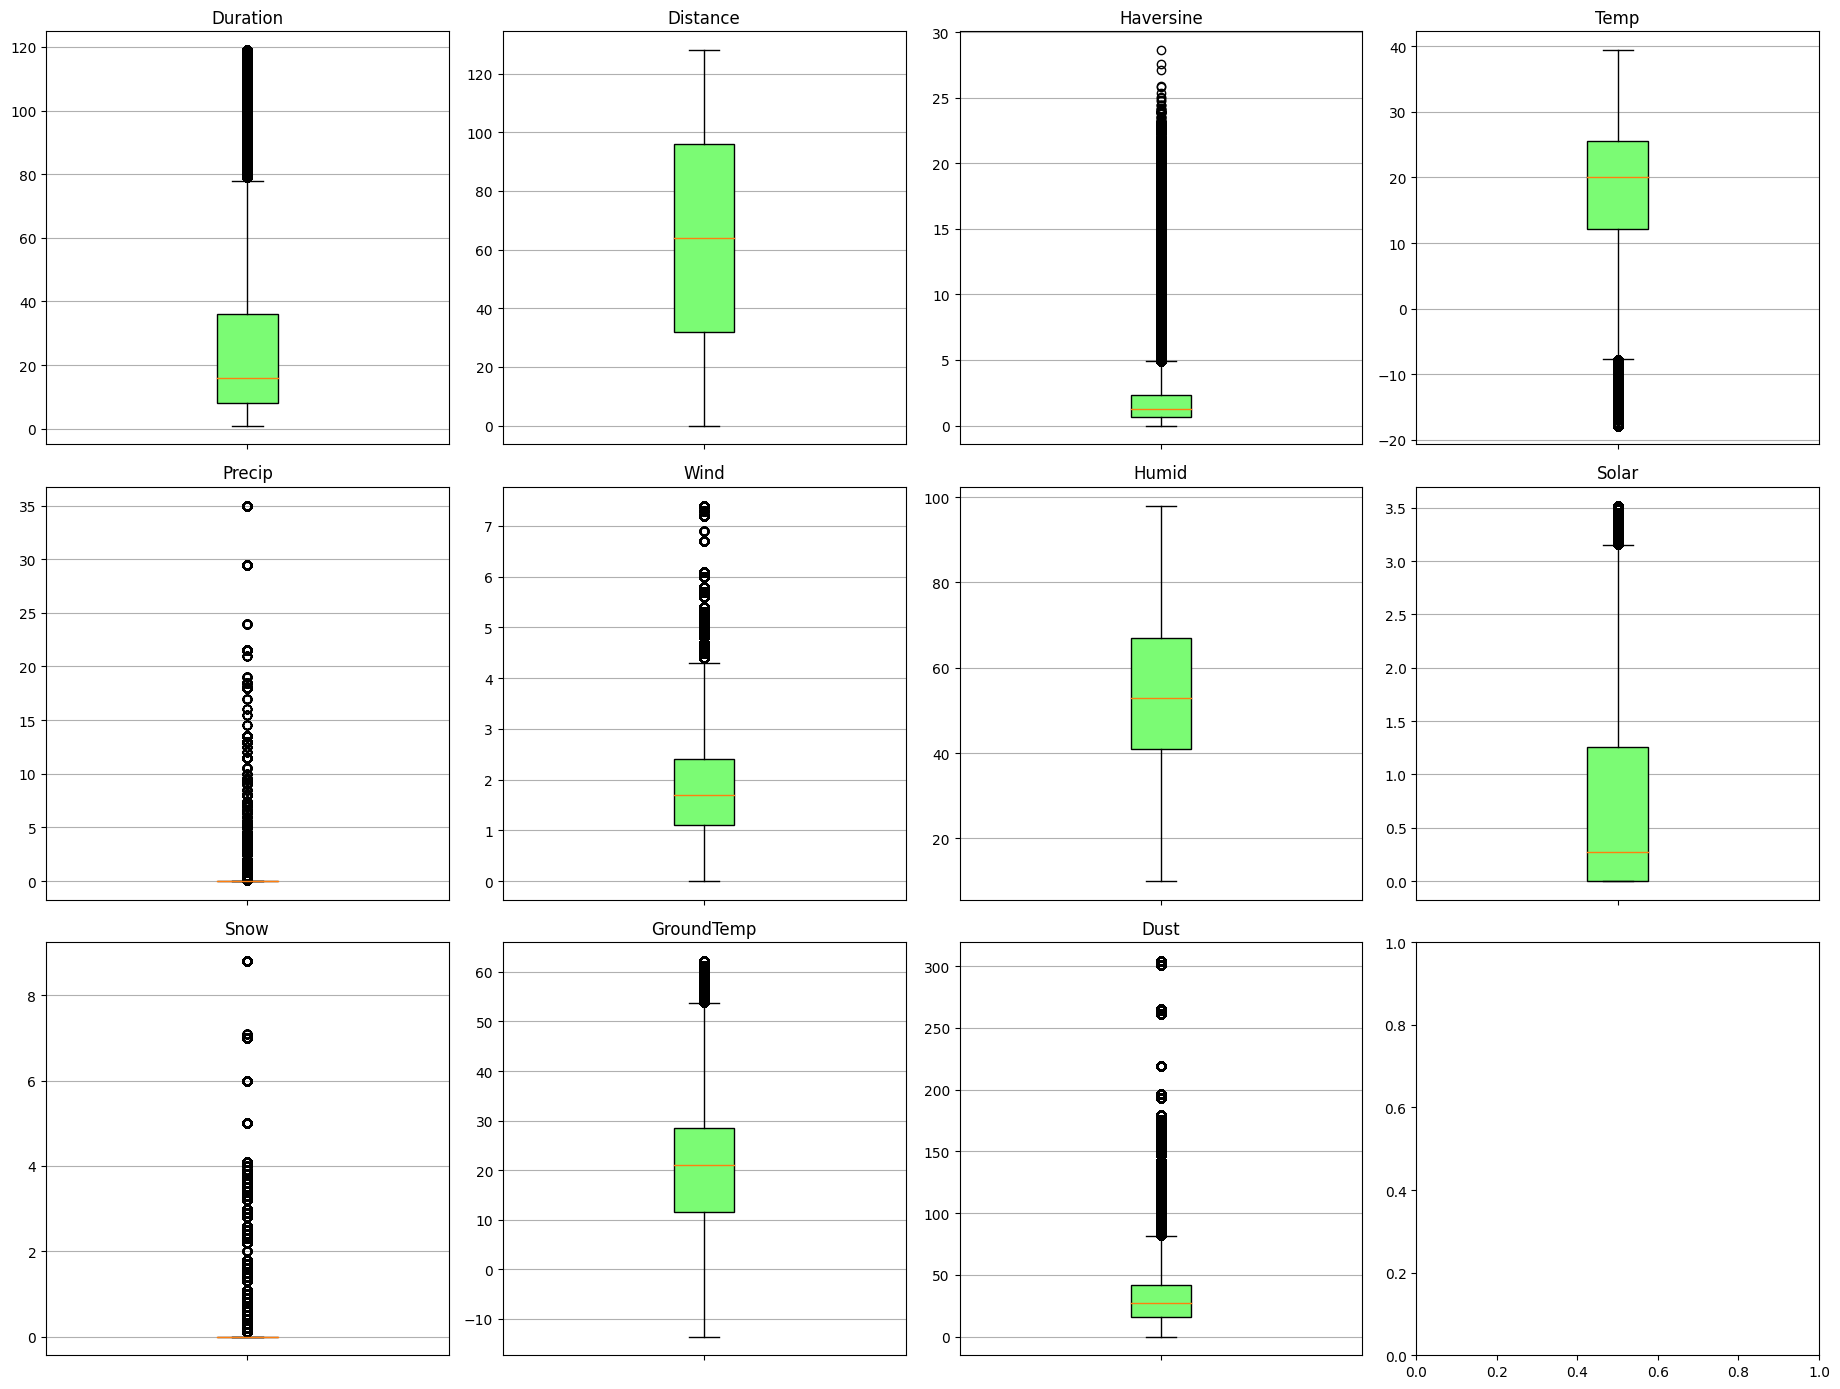

In [25]:
num_vars = ['Duration', 'Distance', 'Haversine','Temp','Precip', 'Wind', 'Humid', 'Solar', 'Snow','GroundTemp', 'Dust'] 

fig, axes = plt.subplots(nrows=3,ncols=4) # create figure and axes

axes = axes.flatten() # Flatten the axes array for easy iteration

for i,col in enumerate(num_vars):
    ax = axes[i]
    box = ax.boxplot(df[col], patch_artist=True)
    box['boxes'][0].set_facecolor('#7BFB74')
    ax.set_xticklabels([])
    ax.set_title(col)
    ax.yaxis.grid(True)

fig.set_size_inches(18.5,14)
plt.tight_layout()
plt.show()

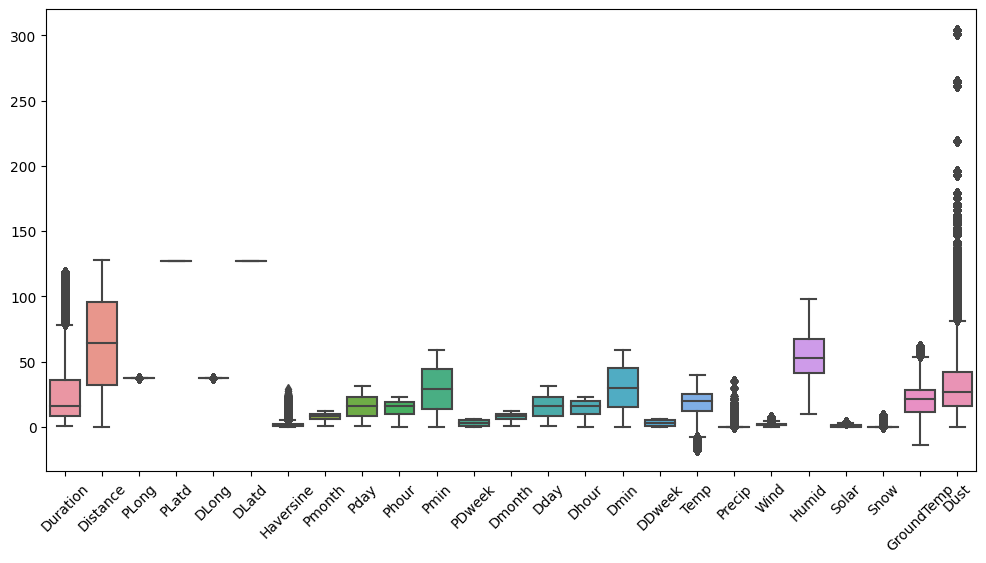

In [26]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(
    data=df.select_dtypes(include=[np.number]),
    ax=ax
)
plt.xticks(rotation=45)
plt.show()